Generate a XOR-type binary data set and train a neural network to classify the data

In [68]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sbn
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [3]:
import keras as k

Using TensorFlow backend.


In [4]:
def adjust_axes(axis_obj, x_label_fontsize, y_label_fontsize, x_label_rotation=0, y_label_rotation=0):
    for tick in axis_obj.xaxis.get_major_ticks():
        tick.label.set_fontsize(x_label_fontsize)
    for tick in axis_obj.yaxis.get_major_ticks():
        tick.label.set_fontsize(y_label_fontsize)
    for tick in axis_obj.xaxis.get_major_ticks():
        tick.label.set_rotation(x_label_rotation)
    for tick in axis_obj.yaxis.get_major_ticks():
        tick.label.set_rotation(y_label_rotation)

In [15]:
np.random.seed(94610)

n = 32

# bottom left corner
X1 = np.random.multivariate_normal(
    mean=[0, 0], 
    cov=np.array([[0.03, 0.015], [0.015, 0.03]]), 
    size=n)
y1 = np.array([0] * n)


# top right corner
X2 = np.random.multivariate_normal(
    mean=[1, 1], 
    cov=np.array([[0.02, 0.01], [0.01, 0.02]]), 
    size=n)
y2 = np.array([0] * n)


# bottom right corner
X3 = np.random.multivariate_normal(
    mean=[1, 0], 
    cov=np.array([[0.03, 0.015], [0.015, 0.03]]), 
    size=n)
y3 = np.array([1] * n)


# top left corner
X4 = np.random.multivariate_normal(
    mean=[0, 1], 
    cov=np.array([[0.02, 0.01], [0.01, 0.02]]), 
    size=n)
y4 = np.array([1] * n)



In [16]:
X = np.vstack([X1, X2, X3, X4])
y = np.concatenate([y1, y2, y3, y4])

indices = np.arange(0, len(X))
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

### Plot the dataset

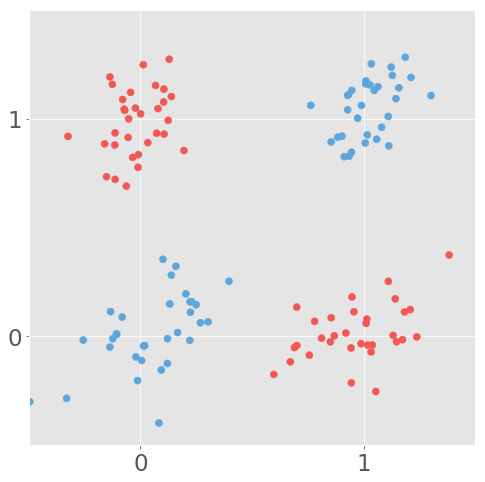

In [82]:
FONTSIZE = 23
plt.close('all')
fig, ax = plt.subplots(1, figsize=(8, 8))

colors = np.array(['#5DA5DA', '#F15854'])

ax.scatter(X[:, 0], X[:, 1], color=colors[y], s=50)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xticks(np.array([0, 1]))
ax.set_yticks(np.array([0, 1]))
adjust_axes(ax, FONTSIZE, FONTSIZE, 0, 0)

### Split the data into three, non-overlapping traning, validation, and testing sets

In [20]:
n_test = 16
n_val = 16

X_test = X[0: n_test]
y_test = y[0: n_test]

X_train = X[n_test:]
y_train = y[n_test:]

X_val = X_train[0: n_val]
y_val = y_train[0: n_val]

X_train_partial = X_train[n_val: ]
y_train_partial = y_train[n_val: ]



In [21]:
X_test.shape, X_val.shape, X_train_partial.shape

((16, 2), (16, 2), (96, 2))

In [22]:
y_test.shape, y_val.shape, y_train_partial.shape

((16,), (16,), (96,))

In [52]:
model = k.models.Sequential()
model.add(k.layers.Dense(8, activation='relu', input_shape=(X.shape[1],)))
model.add(k.layers.Dense(8, activation='relu'))
model.add(k.layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer=k.optimizers.RMSprop(lr=0.04),
    loss=k.losses.binary_crossentropy,
    metrics=[k.metrics.binary_accuracy]
)

In [53]:
history = model.fit(
    X_train_partial,
    y_train_partial,
    epochs=25,
    batch_size=16,
    validation_data=(X_val, y_val),
    verbose=False
)

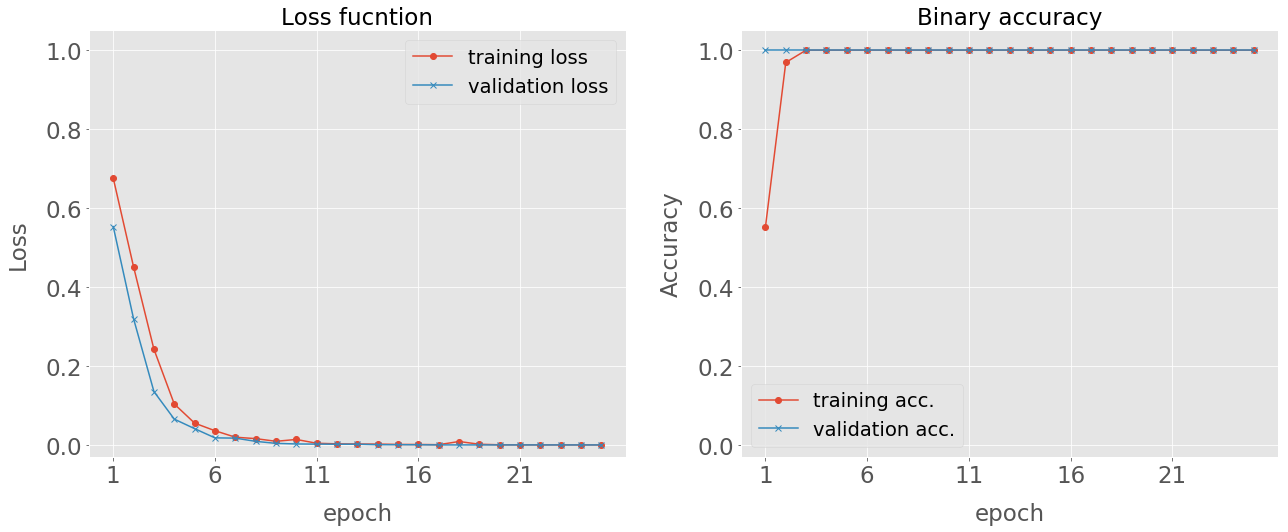

In [55]:
FONTSIZE = 23
plt.close('all')
fig = plt.figure(figsize=(18, 7.5))
gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[1, 1])

epochs = range(1, len(history.history['loss']) + 1)

# plot loss function
train_loss = history.history['loss']
val_loss = history.history['val_loss']
ax = plt.subplot(gs[0, 0])
ax.plot(epochs, train_loss, marker='o', label='training loss')
ax.plot(epochs, val_loss, marker='x', label='validation loss')
ax.set_xlabel('epoch', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel('Loss', fontsize=FONTSIZE, labelpad=15)
ax.set_xticks(np.arange(1, len(epochs)+1, 5))
ax.set_ylim(-0.03, 1.05)
adjust_axes(ax, FONTSIZE, FONTSIZE, 0, 0)
ax.legend(loc='best', fontsize=FONTSIZE*0.85)
ax.set_title('Loss fucntion', fontsize=FONTSIZE)


# plot acuracy
train_acuracy = history.history['binary_accuracy']
val_accuracy = history.history['val_binary_accuracy']
ax = plt.subplot(gs[0, 1])
ax.plot(epochs, train_acuracy, marker='o', label='training acc.')
ax.plot(epochs, val_accuracy, marker='x', label='validation acc.')
ax.set_xlabel('epoch', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel('Accuracy', fontsize=FONTSIZE, labelpad=15)
ax.set_xticks(np.arange(1, len(epochs)+1, 5))
ax.set_ylim(-0.03, 1.05)
adjust_axes(ax, FONTSIZE, FONTSIZE, 0, 0)
ax.legend(loc='best', fontsize=FONTSIZE*0.85)
ax.set_title('Binary accuracy', fontsize=FONTSIZE)

plt.tight_layout(w_pad=3.0, h_pad=1)

#### Plot the decision boundary

In [75]:
grid = np.mgrid[-0.5:1.5:100j, -0.5:1.5:100j].astype(np.float32)
grid_2d = grid.reshape(2, -1).T
pred_probs = model.predict_proba(grid_2d)

In [76]:
pred_probs.shape, grid.shape

((10000, 1), (2, 100, 100))

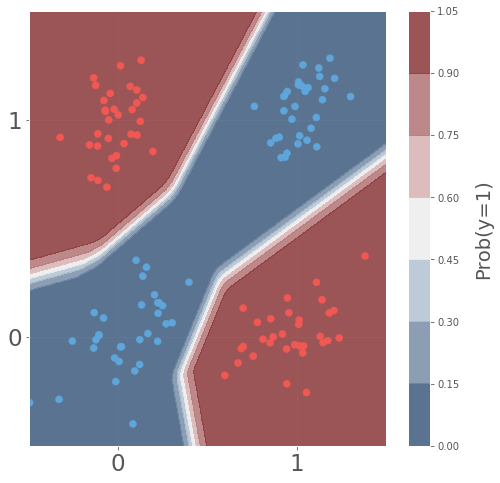

In [81]:
FONTSIZE = 23
cmap = sbn.diverging_palette(250, 12, s=85, l=25, as_cmap=True)
plt.close('all')
fig, ax = plt.subplots(1, figsize=(8, 8))

contour = ax.contourf(grid[0], grid[1], pred_probs.reshape(100, 100), cmap=cmap, alpha=0.8)

colors = np.array(['#5DA5DA', '#F15854'])

ax.scatter(X[:, 0], X[:, 1], color=colors[y], s=50)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xticks(np.array([0, 1]))
ax.set_yticks(np.array([0, 1]))
adjust_axes(ax, FONTSIZE, FONTSIZE, 0, 0)

cbar = plt.colorbar(contour, ax=ax)
_ = cbar.ax.set_ylabel('Prob(y=1)', 
                   fontsize=FONTSIZE*0.85, labelpad=15)